<a href="https://colab.research.google.com/github/AIBYTECH/Phython/blob/main/Multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 [==============================] - 0s 0us/step


In [ ]:
len(train_data)

8982

In [ ]:
type(train_data)

numpy.ndarray

In [ ]:
len(test_data)

2246

In [ ]:
train_data[10]

[1,
 245,
 273,
 207,
 156,
 53,
 74,
 160,
 26,
 14,
 46,
 296,
 26,
 39,
 74,
 2979,
 3554,
 14,
 46,
 4689,
 4329,
 86,
 61,
 3499,
 4795,
 14,
 61,
 451,
 4329,
 17,
 12]

In [ ]:
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

550378/550378 [==============================] - 0s 0us/step


In [ ]:
len(word_index)

30979

In [ ]:
type(word_index)

dict

In [ ]:
word_index['hebei']

9407

In [ ]:
word_index.keys()

dict_keys(['mdbl', 'fawc', 'degussa', 'woods', 'hanging', 'localized', 'sation', 'chanthaburi', 'refunding', 'hermann', 'passsengers', 'stipulate', 'heublein', 'screaming', 'tcby', 'four', 'grains', 'broiler', 'wooden', 'wednesday', 'highveld', 'duffour', '0053', 'elections', '270', '271', '272', '273', '274', 'rudman', '276', '277', '278', '279', 'dormancy', 'errors', 'deferred', 'sptnd', 'cooking', 'stratabit', 'designing', 'metalurgicos', 'databank', '300er', 'shocks', 'nawg', 'tnta', 'perforations', 'affiliates', '27p', 'ching', 'china', 'wagyu', 'affiliated', 'chino', 'chinh', 'slickline', 'doldrums', 'kids', 'climbed', 'controversy', 'kidd', 'spotty', 'rebel', 'millimetres', 'golden', 'projection', 'stern', "hudson's", 'dna', 'dnc', 'hodler', 'lme', 'insolvancy', 'music', 'therefore', 'dns', 'distortions', 'thassos', 'populations', 'meteorologist', 'loss', 'exco', 'adventist', 'murchison', 'locked', 'kampala', 'arndt', 'nakasone', 'steinweg', "india's", 'wang', 'wane', 'unjust', 

In [ ]:
word_index.values()

dict_values([10996, 16260, 12089, 8803, 13796, 20672, 20673, 20675, 10997, 8804, 20676, 20677, 8352, 20713, 16261, 185, 1642, 20680, 12090, 1220, 13797, 7593, 20681, 3914, 2563, 3551, 5113, 3552, 3400, 7975, 3401, 3478, 3632, 4309, 9381, 7247, 3086, 20683, 8805, 20684, 16262, 20685, 13798, 20686, 20687, 7972, 20688, 20689, 2891, 20690, 16263, 595, 16264, 3189, 16265, 16266, 20692, 13799, 12092, 3028, 6693, 20693, 12093, 12639, 9382, 4007, 5689, 12094, 7903, 10066, 20695, 20696, 2394, 20697, 13800, 1984, 10998, 6959, 13801, 20698, 8806, 43, 9383, 20813, 16267, 10999, 13802, 20699, 1267, 20700, 3633, 3029, 10067, 13803, 13804, 850, 20701, 16268, 7973, 4677, 6422, 16269, 1858, 16270, 20702, 20703, 16271, 20704, 20705, 20706, 11000, 12095, 20707, 20708, 2461, 20709, 16272, 20711, 16273, 16274, 20712, 16275, 11001, 4205, 16276, 1916, 4819, 6164, 12096, 6165, 8807, 11129, 20714, 20715, 20716, 1788, 13805, 8808, 13806, 20717, 20718, 10089, 11002, 6960, 20719, 3891, 4008, 4206, 3079, 4550, 616

In [ ]:
decoded_newswire[9]

'd'

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results
  
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
type(x_train)

numpy.ndarray

In [ ]:
x_train.shape

(8982, 10000)

In [ ]:
def to_one_hot(labels, dimension=46):
  results = np.zeros((len(labels), dimension))
  for i, label in enumerate(labels):
    results[i, label] = 1
  return results
  
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [ ]:
one_hot_train_labels[9]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [ ]:
type(one_hot_train_labels)

numpy.ndarray

In [ ]:
one_hot_train_labels.shape

(8982, 46)

In [ ]:
from keras import models
from keras import layers
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

In [ ]:
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 [==============================] - 3s 139ms/step - loss: 2.8364 - accuracy: 0.4890 - val_loss: 1.8911 - val_accuracy: 0.6070
Epoch 2/20
16/16 [==============================] - 1s 66ms/step - loss: 1.5678 - accuracy: 0.6755 - val_loss: 1.3663 - val_accuracy: 0.6930
Epoch 3/20
16/16 [==============================] - 1s 63ms/step - loss: 1.1750 - accuracy: 0.7439 - val_loss: 1.1715 - val_accuracy: 0.7470
Epoch 4/20
16/16 [==============================] - 1s 63ms/step - loss: 0.9583 - accuracy: 0.7932 - val_loss: 1.0671 - val_accuracy: 0.7560
Epoch 5/20
16/16 [==============================] - 1s 63ms/step - loss: 0.7931 - accuracy: 0.8297 - val_loss: 1.0005 - val_accuracy: 0.7770
Epoch 6/20
16/16 [==============================] - 1s 65ms/step - loss: 0.6605 - accuracy: 0.8599 - val_loss: 0.9539 - val_accuracy: 0.7910
Epoch 7/20
16/16 [==============================] - 1s 62ms/step - loss: 0.5518 - accuracy: 0.8856 - val_loss: 0.9036 - val_accuracy: 0.8050
Epoch 8/20
1

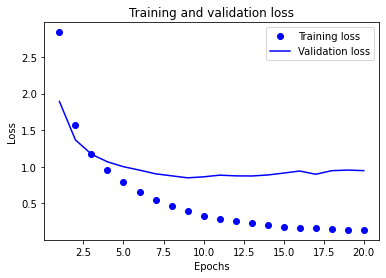

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train,
partial_y_train,
epochs=9,
batch_size=512,
validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)

Epoch 1/9
16/16 [==============================] - 3s 151ms/step - loss: 2.7411 - accuracy: 0.5093 - val_loss: 1.8555 - val_accuracy: 0.5920
Epoch 2/9
16/16 [==============================] - 2s 99ms/step - loss: 1.5432 - accuracy: 0.6808 - val_loss: 1.3780 - val_accuracy: 0.6840
Epoch 3/9
16/16 [==============================] - 1s 67ms/step - loss: 1.1676 - accuracy: 0.7458 - val_loss: 1.1864 - val_accuracy: 0.7340
Epoch 4/9
16/16 [==============================] - 1s 66ms/step - loss: 0.9376 - accuracy: 0.7989 - val_loss: 1.0827 - val_accuracy: 0.7580
Epoch 5/9
16/16 [==============================] - 1s 64ms/step - loss: 0.7651 - accuracy: 0.8358 - val_loss: 0.9748 - val_accuracy: 0.8050
Epoch 6/9
16/16 [==============================] - 1s 66ms/step - loss: 0.6318 - accuracy: 0.8632 - val_loss: 0.9245 - val_accuracy: 0.7980
Epoch 7/9
16/16 [==============================] - 1s 66ms/step - loss: 0.5287 - accuracy: 0.8851 - val_loss: 0.8806 - val_accuracy: 0.8150
Epoch 8/9
16/16 [==

In [ ]:
results

[0.9478172659873962, 0.7858415246009827]

In [ ]:
import copy
test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)
float(np.sum(hits_array)) / len(test_labels)

0.19278717720391808

In [ ]:
predictions = model.predict(x_test)

71/71 [==============================] - 0s 5ms/step


In [ ]:
predictions[0].shape

(46,)

In [ ]:
np.sum(predictions[8])

0.9999999

In [ ]:
np.argmax(predictions[9])

3